In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
import datetime as dt
import plotly.graph_objects as go
import os

%matplotlib inline

In [2]:
stock = 'POWERGRID.NS'

df = yf.download(stock)
df.tail()

C:\Users\srmpc\AppData\Local\Temp\ipykernel_18836\1580509385.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2025-06-23,290.250000,293.450012,288.100006,291.399994,6833477
2025-06-24,285.950012,294.700012,285.350006,293.450012,15007849
2025-06-25,290.450012,291.100006,286.500000,286.500000,10838516
2025-06-26,293.500000,294.250000,289.750000,290.799988,10232220
2025-06-27,299.250000,300.700012,294.149994,295.000000,15522277


In [19]:
df.index

DatetimeIndex(['2007-10-05', '2007-10-08', '2007-10-09', '2007-10-10',
               '2007-10-11', '2007-10-12', '2007-10-15', '2007-10-16',
               '2007-10-17', '2007-10-18',
               ...
               '2025-06-13', '2025-06-16', '2025-06-17', '2025-06-18',
               '2025-06-19', '2025-06-20', '2025-06-23', '2025-06-24',
               '2025-06-25', '2025-06-26'],
              dtype='datetime64[ns]', name='Date', length=4369, freq=None)

In [20]:

if isinstance(df.columns[0], tuple):
    df.columns = [col[0] for col in df.columns]  # Keep only 'Open', 'High', etc.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4369 entries, 2007-10-05 to 2025-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4369 non-null   float64
 1   High    4369 non-null   float64
 2   Low     4369 non-null   float64
 3   Open    4369 non-null   float64
 4   Volume  4369 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 204.8 KB


In [24]:
save_path = "../Stock Price Prediction/data/raw"
os.makedirs(save_path, exist_ok=True)
file_path = os.path.join(save_path, "powergrid_clean.csv")

In [25]:
df.to_csv(file_path)

In [26]:
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

In [31]:
fig = go.Figure(data=[go.Candlestick(
    x = df.index,
    open = df['Open'],
    close = df['Close'],
    high = df['High'],
    low = df['Low']
)
])
fig.update_layout(
    title = "PowerGRID.NS Candlestick",
    xaxis_title = "Date",
    yaxis_title = "Price",
    xaxis_rangeslider_visible = False,
    width = 1000,
    height = 400
)

fig.show()

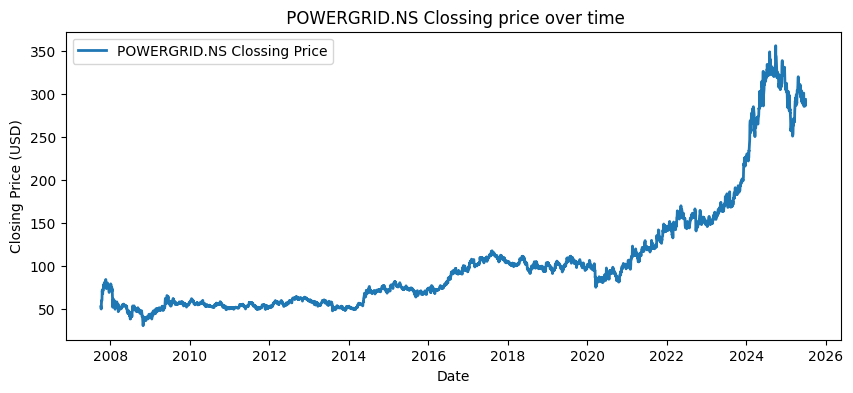

In [32]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'], label = f'{stock} Clossing Price', linewidth = 2)
plt.title(f' {stock} Clossing price over time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

<Axes: xlabel='Date'>

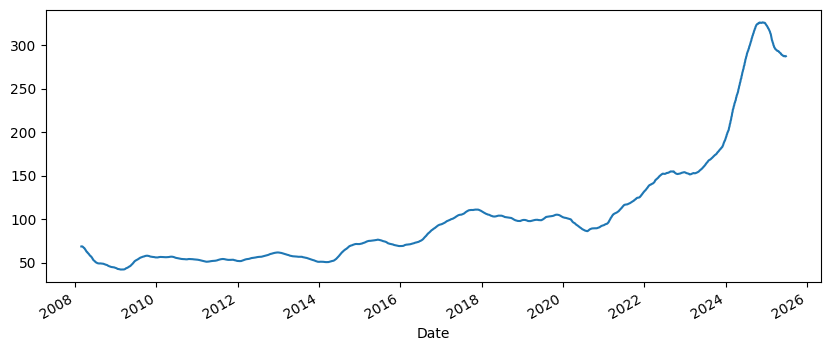

In [40]:
#Moving avg
ma100 = df['Close'].rolling(100).mean()
ma100.plot(figsize=(10,4))

In [ ]:
#Exponantial avg
ma200 = df['Close'].rolling(200).mean()

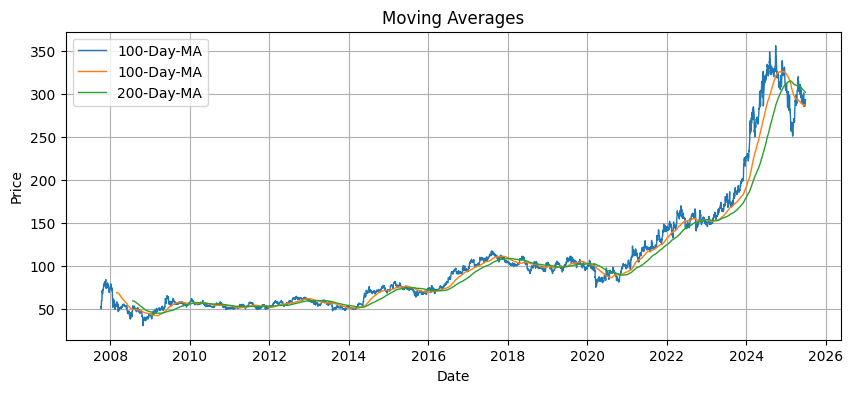

In [47]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'], label = "100-Day-MA", linewidth = 1)
plt.plot(ma100, label = "100-Day-MA", linewidth = 1)
plt.plot(ma200, label = "200-Day-MA", linewidth = 1)
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df['Close'].ewm()